4\. **PCA on the MAGIC dataset** 

In [28]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
from scipy import linalg as la

file_name = "magic_data.dat"
data = pd.read_csv(file_name) 
df= pd.DataFrame(data.values, columns=['fLength','fWidth','fSize','fConc','fConc1','fAsym','fM3Long','fM3Trans','fAlpha','fDist','class'])
print(df)
df = df.drop(columns=['class']) # no need for class to perform PCA

        fLength   fWidth   fSize   fConc  fConc1     fAsym   fM3Long fM3Trans  \
0       31.6036  11.7235  2.5185  0.5303  0.3773   26.2722   23.8238  -9.9574   
1       162.052  136.031  4.0612  0.0374  0.0187   116.741   -64.858  -45.216   
2       23.8172   9.5728  2.3385  0.6147  0.3922   27.2107   -6.4633  -7.1513   
3       75.1362  30.9205  3.1611  0.3168  0.1832   -5.5277   28.5525  21.8393   
4        51.624  21.1502  2.9085   0.242   0.134   50.8761   43.1887   9.8145   
...         ...      ...     ...     ...     ...       ...       ...      ...   
19014   21.3846   10.917  2.6161  0.5857  0.3934   15.2618   11.5245   2.8766   
19015   28.9452    6.702  2.2672  0.5351  0.2784   37.0816   13.1853  -2.9632   
19016   75.4455  47.5305  3.4483  0.1417  0.0549   -9.3561   41.0562  -9.4662   
19017  120.5135  76.9018  3.9939  0.0944  0.0683    5.8043  -93.5224 -63.8389   
19018  187.1814  53.0014  3.2093  0.2876  0.1539 -167.3125 -168.4558  31.4755   

        fAlpha     fDist cl

In [60]:
# We re-scale the data-set to mean zero and unitary std before executing the PCA   
for column in df.columns: 
    mean =df[column].mean()
    std= df[column].std()
    df[column]= (df[column]-mean)/std
print(df)

        fLength    fWidth     fSize     fConc    fConc1     fAsym   fM3Long  \
0     -0.510977 -0.570016 -0.648583  0.820344  1.471692  0.516924  0.260363   
1      2.568135  6.205533  2.615635 -1.875781 -1.773157  2.044929 -1.478449   
2     -0.694767 -0.687243 -1.029448  1.282005  1.606517  0.532776 -0.333486   
3      0.516569  0.476342  0.711102 -0.347485 -0.284653 -0.020171   0.35308   
4     -0.038414 -0.056201  0.176623 -0.756635 -0.729847  0.932481  0.640056   
...         ...       ...       ...       ...       ...       ...       ...   
19014 -0.752187 -0.613975  -0.44207  1.123377  1.617375   0.33096  0.019206   
19015 -0.573726  -0.84372 -1.180312  0.846599  0.576779  0.699494   0.05177   
19016   0.52387  1.381693  1.318793 -1.305268 -1.445595 -0.084832  0.598244   
19017  1.587658  2.982616  2.473235 -1.563996 -1.324343  0.171225  -2.04048   
19018   3.16129  1.679892  0.813089 -0.507207 -0.549778 -2.752692 -3.509723   

       fM3Trans    fAlpha     fDist  
0     -0.4900

In [69]:
cov = df.cov()
print('Covariance Matrix \n',cov,'\n')

Covariance Matrix 
            fLength    fWidth     fSize     fConc    fConc1     fAsym  \
fLength   1.000000  0.770511  0.702451 -0.631003 -0.598155 -0.368546   
fWidth    0.770511  1.000000  0.717515 -0.609779 -0.581145 -0.266954   
fSize     0.702451  0.717515  1.000000 -0.850852 -0.808842 -0.159854   
fConc    -0.631003 -0.609779 -0.850852  1.000000  0.976413  0.112271   
fConc1   -0.598155 -0.581145 -0.808842  0.976413  1.000000  0.100164   
fAsym    -0.368546 -0.266954 -0.159854  0.112271  0.100164  1.000000   
fM3Long  -0.119742 -0.176231  0.095162 -0.121900 -0.118767  0.274041   
fM3Trans  0.013377  0.039737  0.015447 -0.011293 -0.010969  0.002564   
fAlpha   -0.008763  0.066070 -0.186667  0.235272  0.229804 -0.055703   
fDist     0.418449  0.336810  0.437038 -0.328347 -0.304655 -0.206701   

           fM3Long  fM3Trans    fAlpha     fDist  
fLength  -0.119742  0.013377 -0.008763  0.418449  
fWidth   -0.176231  0.039737  0.066070  0.336810  
fSize     0.095162  0.015447 -0.18

In [115]:
l,V= la.eig(cov)
l=l.real
V=V.real
print("Eigenvalues:", l,'\n')
print("Eigenvectors:", V,'\n')

Eigenvalues: [4.22399509 1.57519411 0.02024238 0.15475412 0.22036523 0.40754625
 0.7420321  0.65009695 0.99397005 1.01180371] 

Eigenvectors: [[-4.08275186e-01  2.25700676e-01  1.79932385e-02 -9.04664020e-02
   7.53221140e-01 -4.37474789e-01 -1.19456894e-01 -1.49654650e-02
   2.53425232e-02 -4.64294292e-04]
 [-3.95055795e-01  2.45288538e-01 -1.17968113e-02  4.27867609e-01
  -5.39483737e-01 -4.95341364e-01 -5.78900586e-02 -1.68884505e-01
   9.48681862e-02 -1.52563495e-01]
 [-4.48921557e-01 -9.33056880e-02  1.07608543e-01 -8.15749985e-01
  -3.21598800e-01 -1.07270567e-03 -1.59118320e-02 -2.76284854e-02
   5.76175349e-02 -7.05167222e-02]
 [ 4.41614288e-01  1.88362367e-01  7.48908974e-01 -1.48753420e-01
  -7.19144164e-02 -3.30751010e-01 -1.80675035e-01 -1.04297903e-01
  -1.08812465e-01  1.28742456e-01]
 [ 4.29242436e-01  1.95935445e-01 -6.53470924e-01 -3.15174278e-01
  -1.05169648e-01 -3.89089208e-01 -2.05563230e-01 -1.15748987e-01
  -1.16512228e-01  1.38999720e-01]
 [ 1.44681811e-01 -4.86

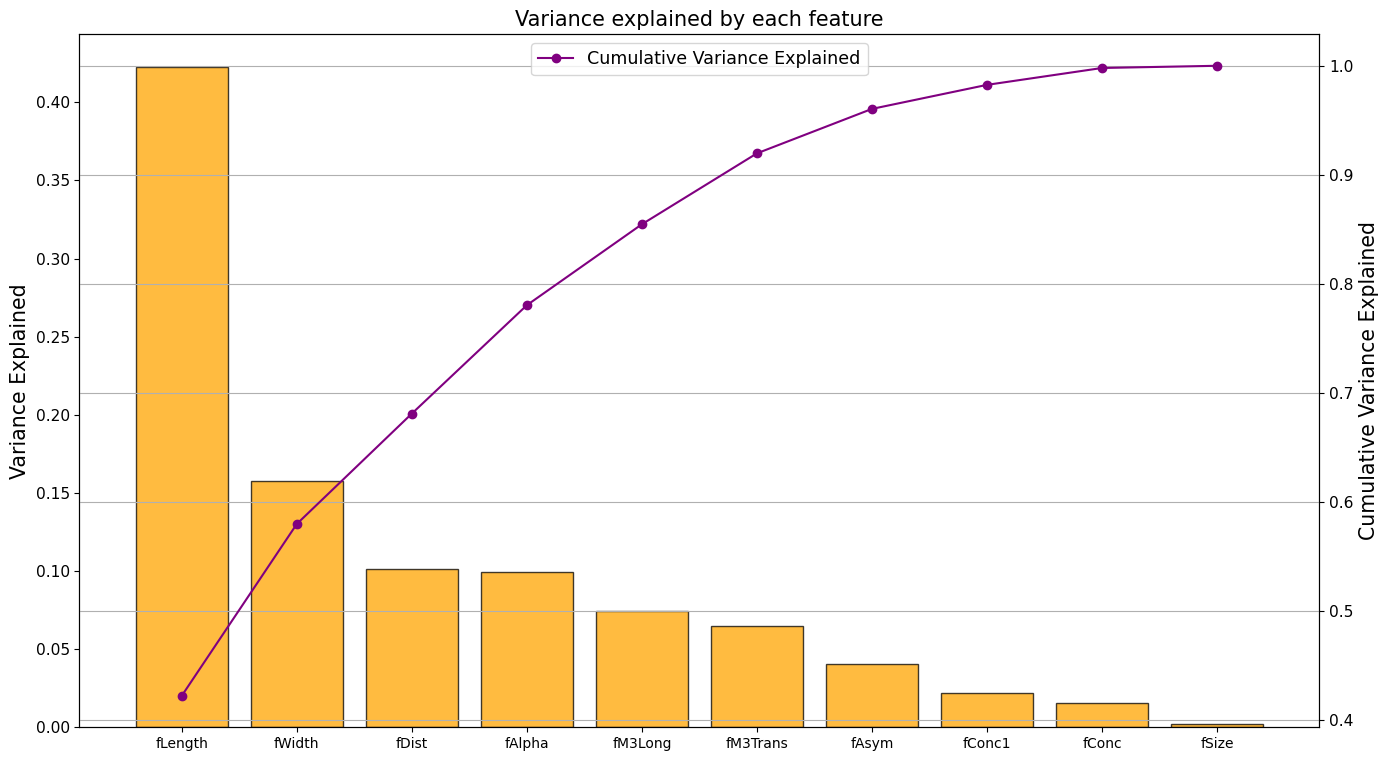

In [199]:
# Sort eigenvalues in descending order and get sorted indices
sorted_indices = np.argsort(l)[::-1]
l_sorted = l[sorted_indices] 
 
variance_explained = l_sorted / np.sum(l_sorted) # ratio of the variance of the data explained by each feature

# Cumulative variance explained
cumulative_variance = np.cumsum(variance_explained)

feature_names = df.columns.tolist()
# List of features ordered from most important to least important to variability 
top_features = []
for i in range(len(feature_names)):
    most_important_feature_idx = sorted_indices[i]  # Index of the feature with the largest eigenvalue
    top_features.append(feature_names[most_important_feature_idx])

# Plotting the variance explained by each feature and cumulative variance explained
fig, ax1 = plt.subplots(figsize=(16, 9))

ax1.bar(top_features, variance_explained, color='Orange', edgecolor='black',alpha=0.75)

# Create a second y-axis to plot the cumulative variance explained
ax2 = ax1.twinx()
ax2.plot(top_features, cumulative_variance, label='Cumulative Variance Explained', marker='o', color='purple')

ax1.set_ylabel('Variance Explained',fontsize='14.7')
ax2.set_ylabel('Cumulative Variance Explained',fontsize='14.7')

plt.title('Variance explained by each feature',fontsize='15')
plt.grid(True)

ax2.legend(loc='upper center',fontsize='12.6')

plt.xticks(rotation=45, ha='right', fontsize=14.5)  
ax1.tick_params(axis='y', labelsize=11.1)  
ax2.tick_params(axis='y', labelsize=11.1)  

plt.show()

In [189]:
# print("If we get rid of the 3 least significant variables we keep", (cov.values.trace()-Lambda[-3,-3]-Lambda[-2,-2]-Lambda[-1,-1])*100/Lambda.trace(),"% of the total variability of the dataset")

If we get rid of the 3 least significant variables we keep 96.04638273169896 % of the total variability of the dataset


In [204]:
df_rotated = np.dot(df, V)
print(df_rotated) 

[[1.6799313116062196 -0.5492784200954225 -0.4150395610028336 ...
  -0.48792641128237446 -0.2226188717783833 0.9811272132399407]
 [-5.965934335727595 1.8313697335839434 -0.011175001264169454 ...
  -3.418578917321149 3.7312895574857414 -1.4911139522899473]
 [2.5570071518521718 -0.03167511978932108 -0.19659003133526992 ...
  -0.251708822306328 0.0308235546527324 0.4413168274004881]
 ...
 [-2.763786022913565 -0.49114131119231363 0.09879823234743197 ...
  -0.04874085329331246 0.6484448698348979 -0.06177247740427605]
 [-4.646968520655216 2.31047702146345 -0.07963219805133952 ...
  -2.8262074234334693 2.9590387121533492 1.1723409452578688]
 [-3.354061435954423 4.764036488183028 0.08360631341206355 ...
  -0.25826781302429525 -1.5743370405554706 -0.09568054945429305]]
